In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [2]:
# Loading  data
df = pd.read_csv('data_balanced_cv.csv')

# Data Prep

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
scaler = StandardScaler()

In [5]:
scaler.fit(df.drop('Y',axis=1))

StandardScaler()

In [6]:
scaled_features = scaler.fit_transform(df.drop('Y',axis=1))

In [7]:
X = pd.DataFrame(scaled_features,columns=df.columns[:-1])
y = df['Y']

In [8]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.05, random_state=69)

In [9]:
x, z = df['Y'].value_counts()
print("Data Split: " + str(int(x/(x+z)*100)) + ":" + str(int(z/(x+z)*100)))

Data Split: 52:47


# Crossvalidate Best Model

In [10]:
from sklearn.svm import SVC

In [11]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate

In [12]:
best_svm = SVC(C=1, gamma=0.1, kernel='rbf')

In [13]:
t0 = datetime.now()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=69)
scores = cross_validate(best_svm, X, y, scoring=['accuracy','roc_auc','precision','recall','f1'], cv=cv, n_jobs=-1)
t1 = datetime.now()

In [14]:
print('Mean ROC AUC: %.2f%% Std Dev: (+/- %.3f%%)' % (np.mean(scores['test_accuracy']*100), np.std(scores['test_accuracy']*100)))
print('Mean ROC AUC: %.2f%% Std Dev: (+/- %.3f%%)' % (np.mean(scores['test_roc_auc']*100), np.std(scores['test_roc_auc']*100)))
print('Mean Precision: %.2f%% Std Dev: (+/- %.3f%%)' % (np.mean(scores['test_precision']*100), np.std(scores['test_precision']*100)))
print('Mean Recall: %.2f%% Std Dev: (+/- %.3f%%)' % (np.mean(scores['test_recall']*100), np.std(scores['test_recall']*100)))
print('Mean F1 Score: %.2f%% Std Dev: (+/- %.3f%%)' % (np.mean(scores['test_f1']*100), np.std(scores['test_f1']*100)))
print("Execution Time: ", (t1 - t0))

Mean ROC AUC: 74.17% Std Dev: (+/- 0.885%)
Mean ROC AUC: 80.24% Std Dev: (+/- 0.848%)
Mean Precision: 77.03% Std Dev: (+/- 1.105%)
Mean Recall: 65.10% Std Dev: (+/- 1.451%)
Mean F1 Score: 70.55% Std Dev: (+/- 1.119%)
Execution Time:  0:10:14.487503


### Final Evaluations

In [15]:
from sklearn.metrics import plot_confusion_matrix, cohen_kappa_score, plot_roc_curve, classification_report
import pickle
import shap

In [16]:
t0 = datetime.now()
best_svm.fit(X,y)
t1 = datetime.now()
print("Training Time: ", (t1 - t0))

Training Time:  0:00:38.340474


In [17]:
predictions = best_svm.predict(X_test)

<Figure size 504x360 with 0 Axes>

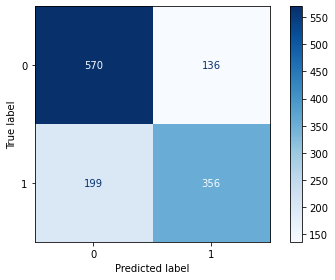

In [18]:
plt.figure(figsize=(7, 5))
ax = plot_confusion_matrix(best_svm,X_test,y_test,cmap=plt.cm.Blues)

plt.tight_layout()
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\svm_conf.png')
plt.show()

<Figure size 504x360 with 0 Axes>

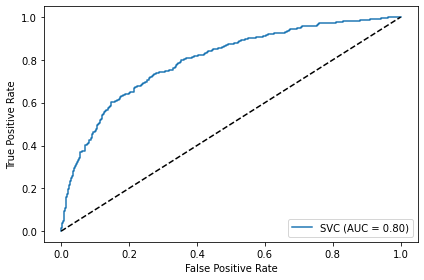

In [19]:
plt.figure(figsize=(7, 5))
ax = plot_roc_curve(best_svm,X_test,y_test)
x = np.linspace(0, 1, 100)
ax = plt.plot(x, x, linestyle='--',color='black')

plt.tight_layout()
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\svm_roc.png')
plt.show()

In [20]:
kappa = cohen_kappa_score(y_test, predictions)
print("Cohen's Kappa: %.2f" % (kappa))

Cohen's Kappa: 0.45
